# This code generates 
## Fig6. Comparison of peak-to-peak amplitude in physiological and reduced Nav models

In [1]:
# import necessary libraries
import numpy as np
import os.path
import sys
import matplotlib.pylab as plt
from eap import graph

ext = '.pdf'
%matplotlib inline

In [2]:
# simulate the cell (or use the data from previous simulation)
simulate_new = False # set False if you want to use previously saved simulated previously data
# here we run both physiologyical and reduced Nav model 

In [3]:
%cd ../../data/HallermannEtAl2012

/home/maria/maja/articles/lfp_phd/final code/data/HallermannEtAl2012


In [4]:
from calcs import simulate as sim

In [5]:
# get neuron params
data_phys = sim.get_data('', simulate_new=simulate_new, run_original=True)
data_red = sim.get_data('', simulate_new=simulate_new, run_original=False)
# exact parameters of the simulation are set in the simulate.py file

In [6]:
# calculate local field potential
calc_lfp_new = False
field_size_type = 'ais_det' # 'ais_det', for fig A-C # both of those calculations are slow as they take a lot of data pts
                    # 'lfp_zoom_out', for fig 6C 

In [7]:
from calcs import calc_lfp 

In [10]:
field_size_type = 'lfp_zoom_out'
lfp_data_phys = calc_lfp.get_lfp_data(data_phys, calc_lfp_new=calc_lfp_new, 
                                      field_size_type=field_size_type, run_original=True)
lfp_data_red = calc_lfp.get_lfp_data(data_red, calc_lfp_new=calc_lfp_new, field_size_type=field_size_type, run_original=False)

In [11]:
def plot_fig6a(data, lfp_data, run_original, normalize = False):
    if run_original:
        color = 'r'
        title = 'physiological'
    else:
        color = 'g'
        title = 'reduced'
    v_ext = lfp_data['v_ext']
    x_range = lfp_data['x_range']
    y_range = lfp_data['y_range']
    seg_coords = data['seg_coords']
    ais_coord = [-8.10, -69.90]
    
    if normalize:
        vmax = 0.3
        ticks = [0, 0.1, 0.2, 0.3]
        str_ticks = ['0%', '10%', '20%', '>30%']
    elif run_original:
        vmax = 750
        ticks = [0, 250, 500, 750]
        str_ticks = [str(0), '250', '500', '>750']#, '>1000']
    else:
        vmax = 400
        ticks = [0, 200, 400]
        str_ticks = [str(0), '200', '>400']#, '>500']   
    # plot the extracellular voltage
    from matplotlib import gridspec
    gs = gridspec.GridSpec(1, 2, width_ratios=(4, 0.3))#, 4,0.5))
    scalebar = 50
    v_ext_um = v_ext/10e2 # change to microvolts

    amplitude = calc_max_peak2peak(v_ext_um)

    if normalize:
        # normalize
        max_ampl = np.max(np.abs(amplitude))
        amplitude = amplitude/max_ampl

    ax = plt.subplot(gs[0,0])

    im = imshow_data(ax,amplitude,x_range=x_range,y_range=y_range,
                vmin=0,vmax=vmax,cmap=cm.YlOrRd,scalebar=scalebar,
                         xp_scbar=-100, yp_scbar=-110)
    autolim = False
    graph.plot_neuron(seg_coords, colors='0.4', autolim = autolim)
    ax.axis('off')
    ax.set_ylim(y_range)
    ax.set_xlim(x_range)
    plt.tight_layout()
    
    scalebar = None
    plt.title(title)
    plt.tight_layout()

    # add colorbar
    axes = plt.subplot(gs[0,1])
    cbar = plt.colorbar(im, cax=axes, drawedges = False, ticks=ticks)
    cbar.ax.set_yticklabels(str_ticks)
    cbar.ax.set_ylabel(u'voltage (µV)')
    plt.tight_layout()

In [12]:
def calc_max_peak2peak(data):
    data_max = np.nanmax(data, axis=0)
    data_min = np.nanmin(data, axis=0)
    data_ampl = data_max - data_min
    return data_ampl

In [13]:
def plot_scalebar(ax, scalebar = 100, xp = 100, yp = -100):
# scalebar
    w, h = scalebar, scalebar
    plt.plot([xp, xp], [yp, yp+h], 'k-')
    plt.plot([xp, xp+h], [yp, yp], 'k-')
    plt.text(xp, yp+h/2., str(scalebar) +u" µm", ha='right', va='center',
             transform=ax.transData)
    plt.text(xp+h/2., yp, str(scalebar) + u" µm", ha='center', va='top',
             transform=ax.transData)

In [14]:
import matplotlib.cm as cm
# plot the imshow of the given field (2d array)
def imshow_data(ax, data, x_range, y_range, vmin=0, vmax=100, cmap=cm.YlOrRd,
               scalebar=100, xp_scbar=20, yp_scbar=-50, log=False, 
                autolim = True):    
    
    plt.sca(ax)
    if log:
        pl = plt.imshow(data, interpolation="nearest", 
           extent=(x_range[0], x_range[1], y_range[0], y_range[1]), 
           origin='lower', vmin=vmin, vmax=vmax, cmap=cmap,
            norm=colors.SymLogNorm(linthresh=0.01 * np.max(data),
                                                linscale=1.0,
                                                vmin=vmin, vmax=vmax))
    else:
        pl = plt.imshow(data, interpolation="nearest", 
           extent=(x_range[0], x_range[1], y_range[0], y_range[1]), 
           origin='lower', vmin=vmin, vmax=vmax, cmap=cmap)     
    
    if scalebar != None:
        plot_scalebar(ax, scalebar=scalebar,xp=xp_scbar,yp=yp_scbar)

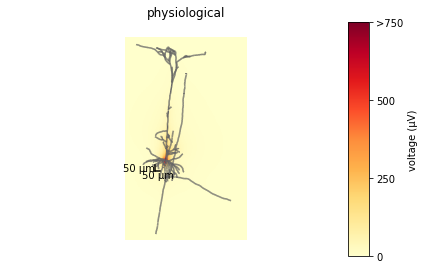

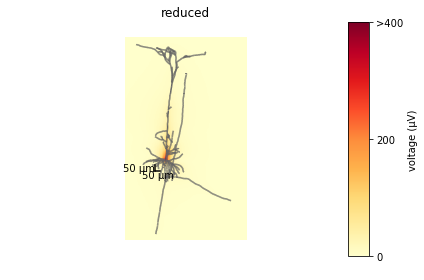

In [15]:
plt.figure()
plot_fig6a(data_phys, lfp_data_phys, run_original=True)
ext = '.pdf'
plt.savefig('../../fig6Aphys_'+field_size_type+ext)

plt.figure()
plot_fig6a(data_red, lfp_data_red, run_original=False)
ext = '.pdf'
plt.savefig('../../fig6Ared_'+field_size_type+ext)

In [30]:
def plot_fig_6b(data,lfp_data_phys, lfp_data_red):
    v_ext_phys = lfp_data_phys['v_ext']
    x_range = lfp_data_phys['x_range']
    y_range = lfp_data_phys['y_range']
    seg_coords = data['seg_coords']
    amplitude_phys = calc_max_peak2peak(v_ext_phys)
    max_ampl_phys = np.max(np.abs(amplitude_phys))
    amplitude_phys = amplitude_phys/max_ampl_phys
    
    v_ext_red = lfp_data_red['v_ext']
    amplitude_red = calc_max_peak2peak(v_ext_red)
    max_ampl_red = np.max(np.abs(amplitude_red))
    amplitude_red = amplitude_red/max_ampl_red
    
    vmin, vmax = -0.2, 0.2
    ticks = [-0.2, 0, 0.2]
    str_ticks = ['> in original ', '0', '> in no AIS']

    from matplotlib import gridspec
    gs = gridspec.GridSpec(1, 2, width_ratios=(3 ,0.3))
    scalebar = 50

    # subtract one from the other
    ampl_diffs = amplitude_red-amplitude_phys

    ax = plt.subplot(gs[0,0])

    im = imshow_data(ax,ampl_diffs,x_range=x_range,y_range=y_range,
                vmin=vmin,vmax=vmax,cmap=cm.PiYG,scalebar=scalebar,
                         xp_scbar=-100, yp_scbar=-110)
    autolim = False
    graph.plot_neuron(seg_coords, colors='0.4', autolim = autolim)
    ax.axis('off')
    ax.set_ylim(y_range)
    ax.set_xlim(x_range)
    plt.tight_layout()
    
    scalebar = None

    plt.title('difference between normalized amplitudes')

    # add colorbar
    axes = plt.subplot(gs[0,1])
    cbar = plt.colorbar(im, cax=axes, drawedges = False, ticks=ticks)
    cbar.ax.set_yticklabels(str_ticks)
    cbar.ax.set_ylabel(u'voltage normalized')

    plt.tight_layout()

1.0
1.0


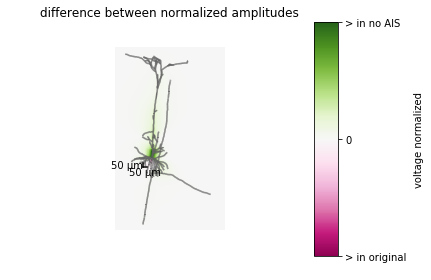

In [31]:
plot_fig_6b(data_phys,lfp_data_phys, lfp_data_red)
ext = '.pdf'
plt.savefig('../../fig6b_'+field_size_type+ext)